## Setup

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd "/content/gdrive/My Drive/mini"

/content/gdrive/My Drive/mini


In [3]:
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim

In [4]:
## use gpu

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## Data Loading

In [5]:
def read_images_from_folder(folder_path):

    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])

    images = []

    for filename in image_files:
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            images.append(image)

    return images


In [6]:
## this is to load the images
trainfolder_path = "./data/tsrd-train"
testfolder_path = "./data/TSRD-Test"

train_images = read_images_from_folder(trainfolder_path)
test_images = read_images_from_folder(testfolder_path)


In [7]:
print("number of train image is " + str(len(train_images)))
print("number of train image is " + str(len(test_images)))

number of train image is 4170
number of train image is 1994


In [8]:
def extract_label(file_path):
    # Define the path to your text file
    file_path = file_path  # Replace with the actual path to your text file

    # Open the text file and read it line by line
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Sort the lines lexicographically
    sorted_lines = sorted(lines)


    eighth_elements = []
    for line in sorted_lines:
      # Remove leading/trailing whitespaces and split the line by ';'
      elements = line.strip().split(';')
      # Check if the line has at least 8 elements
      if len(elements) >= 8:
          # Extract the eighth element (index 7) and append to the list
          eighth_elements.append(int(elements[7]))
      else:
          # If the line does not have at least 8 elements, append None
          eighth_elements.append(None)
    return eighth_elements




In [21]:
# this is to load the labels
trainfile_path = "./data/TSRD-Train Annotation/TsignRecgTrain4170Annotation.txt"
testfile_path = "./data/TSRD-Test Annotation/TsignRecgTest1994Annotation.txt"

train_label = extract_label(trainfile_path)
test_label = extract_label(testfile_path)

In [10]:
print("number of train label is " + str(len(train_label)))
print("number of test label is " + str(len(test_label)))

number of train label is 4170
number of test label is 1994


## Custom Dataset

In [11]:
#Create Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform


    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        label = self.labels[index]

        if self.transform:
            sample = self.transform(sample)

        return sample, label


## Get mean and std based on the training set

In [12]:
inputsize = (224,224)

transformTensor = transforms.Compose([

  # Resize image
  transforms.Resize(inputsize),

  # Convert the image to a PyTorch tensor
    transforms.ToTensor(),
])



In [13]:
trainset = CustomDataset(train_images, train_label, transform=transformTensor)

In [14]:
# Calculate mean and std from the training dataset
mean = torch.zeros(3)  # Assuming RGB images, adjust the dimension if needed
std = torch.zeros(3)

for img, _ in trainset:
    mean += img.mean(dim=(1, 2))
    std += img.std(dim=(1, 2))

mean /= len(trainset)
std /= len(trainset)

In [15]:
print("mean is : ", mean)
print("std is : ", std)

mean is :  tensor([0.4323, 0.4204, 0.4275])
std is :  tensor([0.1888, 0.1850, 0.1884])


## Data Augmentation and Data Loader

In [16]:
inputsize = (224,224)

transformTrain = transforms.Compose([
    # Resize the image
    transforms.Resize(inputsize),

    # Blur the image
    transforms.GaussianBlur(kernel_size = (5,5)),

    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the pixel values
    transforms.Normalize(mean, std)

])

## seperate because test no need blur
transformTest = transforms.Compose([
    # Resize the image to the desired size
    transforms.Resize(inputsize),

    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the pixel values
    transforms.Normalize(mean, std)

])

In [17]:
trainset = CustomDataset(train_images, train_label, transform=transformTrain)
testset = CustomDataset(test_images,test_label,transform= transformTest)

batch_size = 32

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size = batch_size,shuffle=True)

## get the number of images of each classes

In [23]:
from collections import Counter

# Your list of numbers
numbers = train_label

# Count the occurrences of each unique number
counted_numbers = Counter(numbers)

# Print the counts
for number, count in counted_numbers.items():
    print(f"Class {number} have {count} images")

Class 0 have 118 images
Class 1 have 40 images
Class 2 have 80 images
Class 3 have 260 images
Class 4 have 98 images
Class 5 have 194 images
Class 6 have 78 images
Class 7 have 152 images
Class 8 have 8 images
Class 9 have 2 images
Class 10 have 70 images
Class 11 have 138 images
Class 12 have 96 images
Class 13 have 36 images
Class 14 have 128 images
Class 15 have 22 images
Class 16 have 142 images
Class 17 have 130 images
Class 18 have 8 images
Class 19 have 4 images
Class 20 have 18 images
Class 21 have 12 images
Class 22 have 18 images
Class 23 have 14 images
Class 24 have 100 images
Class 25 have 2 images
Class 26 have 126 images
Class 27 have 28 images
Class 28 have 446 images
Class 29 have 44 images
Class 30 have 150 images
Class 31 have 42 images
Class 32 have 14 images
Class 33 have 4 images
Class 34 have 26 images
Class 35 have 156 images
Class 36 have 40 images
Class 37 have 58 images
Class 38 have 30 images
Class 39 have 34 images
Class 40 have 32 images
Class 41 have 18 im

## Ensure code above works well

In [ ]:
print(len(trainset))

4170


In [ ]:
print(len(trainset.labels))

4170


In [ ]:
print(trainset.data)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=134x128 at 0x7F072BE693F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=165x151 at 0x7F072BE6A050>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x122 at 0x7F072BE687F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=121x100 at 0x7F072BE694E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=120x102 at 0x7F07202CE9E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=123x108 at 0x7F07202CE080>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=127x114 at 0x7F07202CC3A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=77x69 at 0x7F07202CC4F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=142x130 at 0x7F07202CC550>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=81x67 at 0x7F07202CE440>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=80x73 at 0x7F07202CDF00>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=186x174 at 0x7F07202CD2A0>, <PIL.PngImagePlugin.PngImageFile 

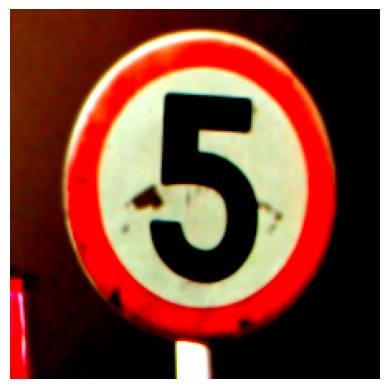

0
(224, 224, 3)


In [ ]:
outimage, outlabel = trainset[0]
outimage = outimage.numpy()

if outimage.shape[0] == 3:
    outimage = outimage.transpose(1, 2, 0)

plt.imshow(outimage)
plt.axis('off')  # Optional: Turn off axis
plt.show()
print(outlabel)
print(outimage.shape)

## Train and validate function

In [ ]:


def train_and_validate(net, trainloader, testloader, optimizer,scheduler, criterion, num_epochs,netName):


    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    # Transfer model to GPU if available
    if torch.cuda.is_available():
        net = net.cuda()

    # Set model to training mode
    net.train()

    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_train_correct = 0
        running_train_total = 0

        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()

            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            running_train_total += labels.size(0)
            running_train_correct += (predicted == labels).sum().item()

        train_loss = running_train_loss / len(trainloader)
        train_accuracy = 100.0 * running_train_correct / running_train_total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        net.eval()  # Set model to evaluation mode
        running_test_loss = 0.0
        running_test_correct = 0
        running_test_total = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                if torch.cuda.is_available():
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                running_test_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                running_test_total += labels.size(0)
                running_test_correct += (predicted == labels).sum().item()

        test_loss = running_test_loss / len(testloader)
        test_accuracy = 100.0 * running_test_correct / running_test_total
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch + 1}/{num_epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

        scheduler.step()

        if (epoch % 3 == 0):
          ## save each epoch of model
          model_path = './model/'+str(epoch + 1) + netName +'.pth'
          torch.save(net,model_path)

        net.train()  # Set model back to training mode

    return train_losses, train_accuracies, test_losses, test_accuracies


## Model selection GoogLeNet

In [ ]:
from torchvision.models import googlenet, GoogLeNet_Weights

googlenet = googlenet(weights = GoogLeNet_Weights.IMAGENET1K_V1)


In [ ]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:

# Freeze all layers except the classification layer
for name, param in googlenet.named_parameters():
    if 'fc' not in name:  # Assuming 'fc' is the name of the classification layer
        param.requires_grad = False

In [ ]:
# use to check each freeze state of each layer
for name, param in googlenet.named_parameters():
  print(name, ':', param.requires_grad)

conv1.conv.weight : False
conv1.bn.weight : False
conv1.bn.bias : False
conv2.conv.weight : False
conv2.bn.weight : False
conv2.bn.bias : False
conv3.conv.weight : False
conv3.bn.weight : False
conv3.bn.bias : False
inception3a.branch1.conv.weight : False
inception3a.branch1.bn.weight : False
inception3a.branch1.bn.bias : False
inception3a.branch2.0.conv.weight : False
inception3a.branch2.0.bn.weight : False
inception3a.branch2.0.bn.bias : False
inception3a.branch2.1.conv.weight : False
inception3a.branch2.1.bn.weight : False
inception3a.branch2.1.bn.bias : False
inception3a.branch3.0.conv.weight : False
inception3a.branch3.0.bn.weight : False
inception3a.branch3.0.bn.bias : False
inception3a.branch3.1.conv.weight : False
inception3a.branch3.1.bn.weight : False
inception3a.branch3.1.bn.bias : False
inception3a.branch4.1.conv.weight : False
inception3a.branch4.1.bn.weight : False
inception3a.branch4.1.bn.bias : False
inception3b.branch1.conv.weight : False
inception3b.branch1.bn.weight 

In [ ]:
# ## modify output layer to only 58 classes
# num_classes = 58
# in_c = googlenet.fc.in_features

# googlenet.fc = nn.Linear(in_c,num_classes)

In [ ]:
num_classes = 58  # Replace with the number of classes in your new task

# Create a new classifier without weights and biases
classifier = torch.nn.Sequential(
    torch.nn.Linear(1024, num_classes),  # Replace 1024 with the appropriate number of input features
)

In [ ]:
googlenet.fc = classifier  # Replace 'fc' with the actual name of the classifier layer in your model


In [ ]:
# check output layer
print(googlenet.fc)

Sequential(
  (0): Linear(in_features=1024, out_features=58, bias=True)
)


## Set optimizer, loss function

In [ ]:
goo_optimizer = optim.SGD(googlenet.parameters(),lr = 0.001, momentum = 0.9)

In [ ]:
from torch.optim import lr_scheduler
import torch.nn.functional as F

goo_scheduler = lr_scheduler.StepLR(goo_optimizer,step_size = 60, gamma = 0.1)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
Gtrain_losses, Gtrain_accuracies, Gtest_losses, Gtest_accuracies =  train_and_validate(googlenet, train_loader,test_loader, goo_optimizer,goo_scheduler, criterion, 30, 'GoogLeNet')

Epoch 1/30: Train Loss: 3.2348, Train Accuracy: 24.24%, Test Loss: 3.3004, Test Accuracy: 23.07%
Epoch 2/30: Train Loss: 2.4006, Train Accuracy: 50.19%, Test Loss: 2.9473, Test Accuracy: 33.30%
Epoch 3/30: Train Loss: 1.9620, Train Accuracy: 63.50%, Test Loss: 2.7119, Test Accuracy: 41.32%
Epoch 4/30: Train Loss: 1.6735, Train Accuracy: 70.31%, Test Loss: 2.5477, Test Accuracy: 42.93%
Epoch 5/30: Train Loss: 1.4645, Train Accuracy: 73.29%, Test Loss: 2.4145, Test Accuracy: 46.74%
Epoch 6/30: Train Loss: 1.3157, Train Accuracy: 75.59%, Test Loss: 2.3289, Test Accuracy: 47.54%
Epoch 7/30: Train Loss: 1.1905, Train Accuracy: 78.75%, Test Loss: 2.2535, Test Accuracy: 47.34%
Epoch 8/30: Train Loss: 1.0894, Train Accuracy: 81.03%, Test Loss: 2.2095, Test Accuracy: 49.85%
Epoch 9/30: Train Loss: 1.0046, Train Accuracy: 82.42%, Test Loss: 2.1305, Test Accuracy: 50.05%
Epoch 10/30: Train Loss: 0.9282, Train Accuracy: 84.32%, Test Loss: 2.0762, Test Accuracy: 51.15%
Epoch 11/30: Train Loss: 0.87

## Save train and test data ## useless


In [ ]:
# import csv

# TrainTestData = [Gtrain_losses, Gtrain_accuracies, Gtest_losses, Gtest_accuracies]

# file_path = 'TrainTestData.csv'

# with open(file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(TrainTestData)


## if want to read
# import csv

# # Specify the file path where the CSV file is located
# file_path = 'data.csv'  # Replace with the actual file path

# # Initialize empty lists to store the data
# list1 = []
# list2 = []
# list3 = []
# list4 = []

# # Read data from the CSV file
# with open(file_path, mode='r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         # Extract values from each row and append them to the respective lists
#         list1.append(int(row[0]))
#         list2.append(row[1])
#         list3.append(float(row[2]))
#         list4.append(row[3])

# # Now, list1, list2, list3, and list4 contain the data from the CSV file


NameError: ignored

## Plot Learning graph

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):
    # Plot training and validation losses
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(test_losses, label='Test Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot training and validation accuracies
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have lists train_losses, test_losses, train_accuracies, and test_accuracies
# plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies)


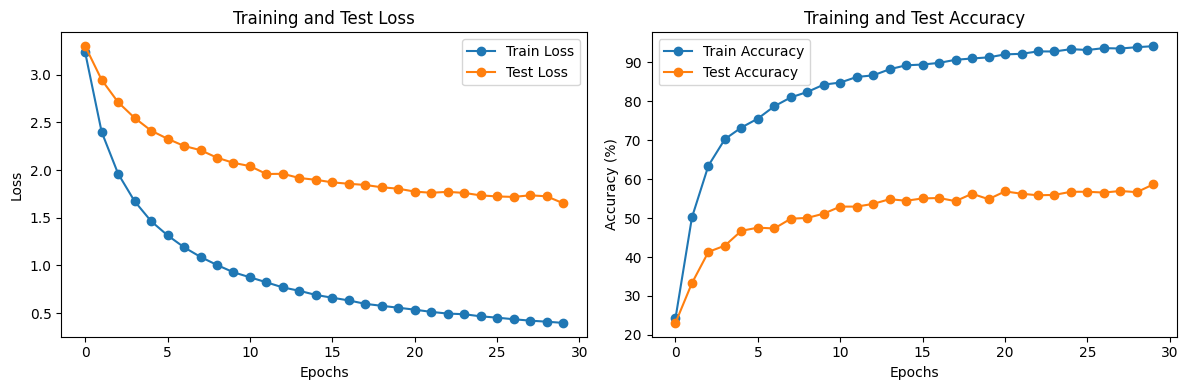

In [ ]:
plot_metrics(Gtrain_losses, Gtest_losses, Gtrain_accuracies, Gtest_accuracies)

##selection of model based on the epoch

In [ ]:
googlenet = torch.load("./model/28GoogLeNet.pth")

##fine tune whole model

In [ ]:
goo_optimizer = optim.SGD(googlenet.parameters(),lr = 0.01, momentum = 0.9)

In [ ]:
from torch.optim import lr_scheduler
import torch.nn.functional as F

goo_scheduler = lr_scheduler.StepLR(goo_optimizer,step_size = 60, gamma = 0.1)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
# Freeze all layers except the classification layer
for name, param in googlenet.named_parameters():
    if 'fc' not in name:  # Assuming 'fc' is the name of the classification layer
        param.requires_grad = True

In [ ]:
GFtrain_losses, GFtrain_accuracies, GFtest_losses, GFtest_accuracies =  train_and_validate(googlenet, train_loader,test_loader, goo_optimizer,goo_scheduler, criterion, 15, 'GoogLeNetF')

Epoch 1/15: Train Loss: 0.0048, Train Accuracy: 100.00%, Test Loss: 0.5602, Test Accuracy: 84.65%
Epoch 2/15: Train Loss: 0.0035, Train Accuracy: 100.00%, Test Loss: 0.5082, Test Accuracy: 86.06%
Epoch 3/15: Train Loss: 0.0025, Train Accuracy: 100.00%, Test Loss: 0.4789, Test Accuracy: 86.76%
Epoch 4/15: Train Loss: 0.0021, Train Accuracy: 100.00%, Test Loss: 0.5004, Test Accuracy: 85.56%
Epoch 5/15: Train Loss: 0.0019, Train Accuracy: 100.00%, Test Loss: 0.5027, Test Accuracy: 86.56%
Epoch 6/15: Train Loss: 0.0016, Train Accuracy: 100.00%, Test Loss: 0.4890, Test Accuracy: 86.76%
Epoch 7/15: Train Loss: 0.0017, Train Accuracy: 100.00%, Test Loss: 0.4690, Test Accuracy: 86.86%
Epoch 8/15: Train Loss: 0.0015, Train Accuracy: 100.00%, Test Loss: 0.4453, Test Accuracy: 87.56%
Epoch 9/15: Train Loss: 0.0013, Train Accuracy: 100.00%, Test Loss: 0.4477, Test Accuracy: 86.96%
Epoch 10/15: Train Loss: 0.0011, Train Accuracy: 100.00%, Test Loss: 0.4374, Test Accuracy: 86.56%
Epoch 11/15: Train 

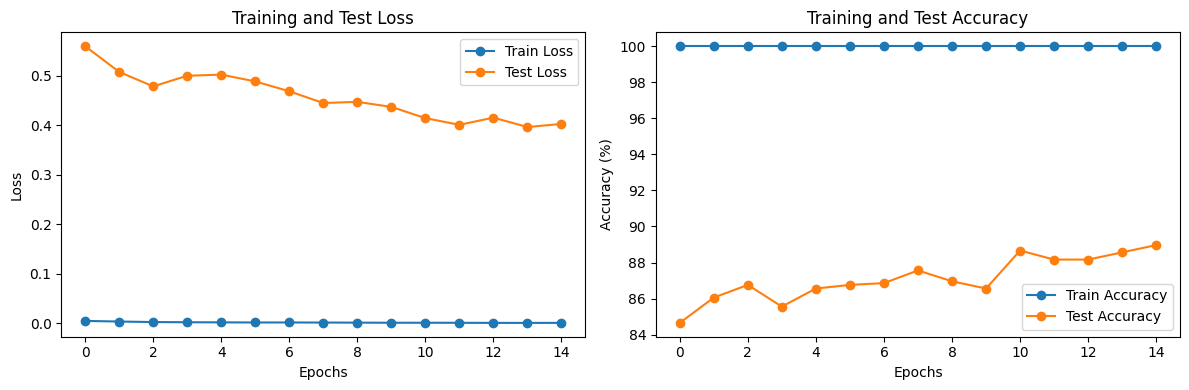

In [ ]:
plot_metrics(GFtrain_losses, GFtest_losses, GFtrain_accuracies, GFtest_accuracies)